In [10]:
import numpy as np                    # Scientific and vector computation library for python
from matplotlib import pyplot as plt  # Plotting library
import pandas as pd                   # library for reading and analysing data from a file

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [11]:
data=pd.read_csv("ex1data1-Copy1.txt",header=None) #reads comma-separated data from file and stores in dataframe namely 'data' header=None specifies thee is no header present in the input file

In [12]:
data.describe()                         #displays statistical details of data like mean,standard deviation,etc.

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [13]:
data.head()                        #displays first 5 lines of data stored in dataframe

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Profit Vs Population')

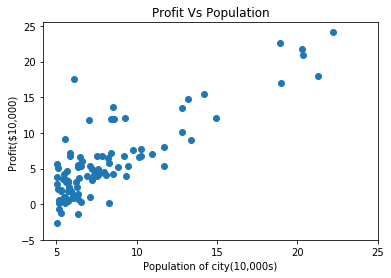

In [14]:
#visualizes input data in a 2D plot
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of city(10,000s)")
plt.ylabel("Profit($10,000)")
plt.title("Profit Vs Population")

In [15]:
#computes cost i.e. mean square error
def costfunction(theta,X,y):
    m=y.shape[0]
    y_pred=np.dot(X,theta)
    error=y_pred-y
    J=0
    J=(1/(2*m))*np.dot(error.T,error)
    return J

In [16]:
#computes gradient of cost with respect to parameters
def gradient(theta,X,y):
    grad=np.dot(X.T,(np.dot(X,theta)-y))
    return grad
    

In [17]:
#applies batch gradient descent to minimize cost
def gradientdescent(theta,X,y,num_iters,alpha):
    J_history=[]
    m=y.shape[0]
    for i in range(num_iters):
        J_history.append(costfunction(theta,X,y))
        theta=theta - (alpha/m)*gradient(theta,X,y)
        
    return J_history,theta    

In [18]:
m,n=data.shape[0],data.shape[1]       #m=number of examples, n=number of features + 1(for output price y)
theta=np.zeros([n,1])                 #initialize parameter vector theta with zeros
alpha=0.01                            #learning rate = alpha
num_iters=1500                        #decide number of iterations for running gradient descent
ones=np.ones([m,1])                   

data_n=np.hstack((ones,data))          #adding a vector of ones as the first column

y=data_n[:,2].reshape(data.shape[0],1) #assigning output vector its values and reshaping it to (k,1) as a numpy array of shape(k,) causes problems in further calculations sometimes
J_history=[]
X=data_n[:,0:2]                        #assigning input feature vectors to input data variable

print('Initial Cost = '+str(costfunction(theta,X,y)))
J_history,theta=gradientdescent(theta,X,y,num_iters,alpha) #calls gradientdescent function

print('Cost after applying linear regression algo = '+str(costfunction(theta,X,y)))
print('Parameters for regression : '+str(theta))




Initial Cost = [[32.07273388]]
Cost after applying linear regression algo = [[4.48338826]]
Parameters for regression : [[-3.63029144]
 [ 1.16636235]]


Text(0.5, 1.0, 'Profit Vs Population')

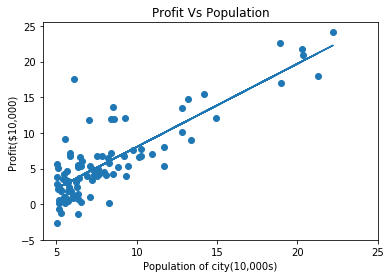

In [19]:
#plots hypothesis with learnt parameters on 2D plot of input data
plt.scatter(data[0],data[1])
plt.xlabel("Population of city(10,000s)")
plt.ylabel("Profit($10,000)")
plt.plot(X[:,1],np.dot(X,theta))
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.title("Profit Vs Population")

In [20]:
#predicts profit with given data of population of city
def predict(theta,X):
    y_pred=np.dot(X,theta)
    return y_pred

In [21]:
print('The predicted profit for a city population of 70,000 = '+str(predict(theta,np.array([1,7]))*10000)) 

The predicted profit for a city population of 70,000 = [45342.45012945]


Text(0, 0.5, 'Cost')

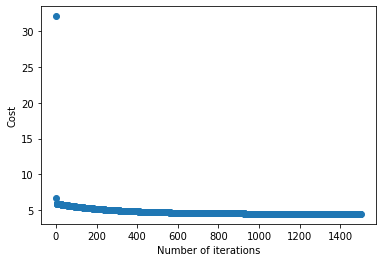

In [22]:
#plots variation of cost with number of iterations
plt.scatter([i for i in range(1,num_iters+1)],J_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")